In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import zipfile
import helper_functions

In [2]:
import zipfile
#Unzip the data
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/archive.zip","r")
zip_ref.extractall()
zip_ref.close()

In [3]:
helper_functions.walk_through_dir("/content/seg_train")

There are 1 directories and 0 images in '/content/seg_train'.
There are 6 directories and 0 images in '/content/seg_train/seg_train'.
There are 0 directories and 2404 images in '/content/seg_train/seg_train/glacier'.
There are 0 directories and 2191 images in '/content/seg_train/seg_train/buildings'.
There are 0 directories and 2274 images in '/content/seg_train/seg_train/sea'.
There are 0 directories and 2271 images in '/content/seg_train/seg_train/forest'.
There are 0 directories and 2382 images in '/content/seg_train/seg_train/street'.
There are 0 directories and 2512 images in '/content/seg_train/seg_train/mountain'.


In [4]:
helper_functions.walk_through_dir("/content/seg_test")

There are 1 directories and 0 images in '/content/seg_test'.
There are 6 directories and 0 images in '/content/seg_test/seg_test'.
There are 0 directories and 553 images in '/content/seg_test/seg_test/glacier'.
There are 0 directories and 437 images in '/content/seg_test/seg_test/buildings'.
There are 0 directories and 510 images in '/content/seg_test/seg_test/sea'.
There are 0 directories and 474 images in '/content/seg_test/seg_test/forest'.
There are 0 directories and 501 images in '/content/seg_test/seg_test/street'.
There are 0 directories and 525 images in '/content/seg_test/seg_test/mountain'.


In [5]:
!ls -la /content/seg_test/

total 12
drwxr-xr-x 3 root root 4096 Mar  8 10:34 .
drwxr-xr-x 1 root root 4096 Mar  8 10:34 ..
drwxr-xr-x 8 root root 4096 Mar  8 10:34 seg_test


In [6]:
train_dir = "/content/seg_train/seg_train/"
test_dir = "/content/seg_test/seg_test/"

In [7]:
import pathlib

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [8]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder+ "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape : {img.shape}")

  return img

Image Shape : (150, 150, 3)


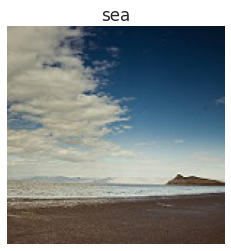

In [9]:
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

#Load data from directory
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,3,activation = "relu",input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Conv2D(32,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Conv2D(32,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names),activation = "softmax")
])

#Compile the model
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

history = model.fit(train_data,
          epochs = 5,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data))

Epoch 1/5
439/439 [==============================] - 50s 83ms/step - loss: 0.9343 - accuracy: 0.6413 - val_loss: 0.7097 - val_accuracy: 0.7293
Epoch 2/5
439/439 [==============================] - 35s 79ms/step - loss: 0.6319 - accuracy: 0.7774 - val_loss: 0.5968 - val_accuracy: 0.7913
Epoch 3/5
439/439 [==============================] - 36s 81ms/step - loss: 0.4918 - accuracy: 0.8270 - val_loss: 0.5990 - val_accuracy: 0.7993
Epoch 4/5
439/439 [==============================] - 35s 80ms/step - loss: 0.3744 - accuracy: 0.8695 - val_loss: 0.6159 - val_accuracy: 0.7897
Epoch 5/5
439/439 [==============================] - 36s 82ms/step - loss: 0.2840 - accuracy: 0.9006 - val_loss: 0.6729 - val_accuracy: 0.7827


In [12]:
model.evaluate(test_data)

94/94 [==============================] - 9s 92ms/step - loss: 0.6729 - accuracy: 0.7827


[0.6728668808937073, 0.7826666831970215]

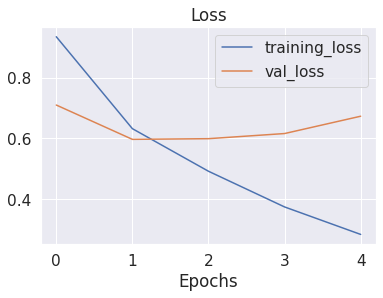

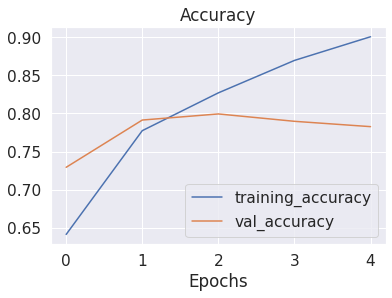

In [13]:
helper_functions.plot_loss_curves(history)

In [19]:
from tensorflow.keras import Sequential,layers
num_classes = len(class_names)

model1 = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
history1 = model1.fit(
  train_data,
  validation_data=test_data,
  epochs=epochs
)

Epoch 1/10
439/439 [==============================] - 40s 85ms/step - loss: 0.9641 - accuracy: 0.6361 - val_loss: 0.7510 - val_accuracy: 0.7050
Epoch 2/10
439/439 [==============================] - 36s 81ms/step - loss: 0.5866 - accuracy: 0.7867 - val_loss: 0.6066 - val_accuracy: 0.7820
Epoch 3/10
439/439 [==============================] - 33s 76ms/step - loss: 0.3904 - accuracy: 0.8631 - val_loss: 0.6235 - val_accuracy: 0.7967
Epoch 4/10
439/439 [==============================] - 36s 83ms/step - loss: 0.2183 - accuracy: 0.9264 - val_loss: 0.6690 - val_accuracy: 0.8013
Epoch 5/10
439/439 [==============================] - 33s 76ms/step - loss: 0.1278 - accuracy: 0.9575 - val_loss: 0.8860 - val_accuracy: 0.7790
Epoch 6/10
439/439 [==============================] - 39s 89ms/step - loss: 0.0787 - accuracy: 0.9763 - val_loss: 0.9483 - val_accuracy: 0.7873
Epoch 7/10
439/439 [==============================] - 39s 89ms/step - loss: 0.0638 - accuracy: 0.9826 - val_loss: 1.1023 - val_accuracy:

In [20]:
model1.evaluate(test_data)

94/94 [==============================] - 6s 66ms/step - loss: 1.3588 - accuracy: 0.7760


[1.3587981462478638, 0.7760000228881836]

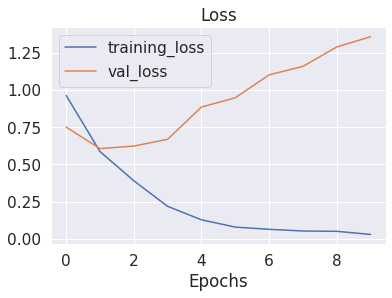

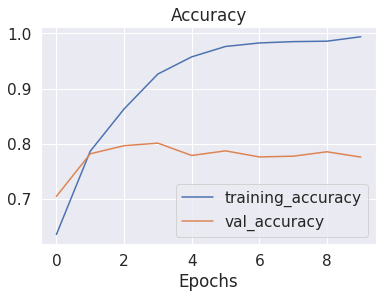

In [21]:
helper_functions.plot_loss_curves(history1)

In [28]:
base_model = tf.keras.applications.EfficientNetB4(include_top = False)
base_model.trainable = True
for layer in base_model.layers[:-5]:
  layer.trainable = False

inputs = layers.Input(shape = (224,224,3), name = "input_layer")
x = base_model(inputs,training = False)
x = layers.GlobalAveragePooling2D(name = "global_avg_pool_layer")(x)

outputs = layers.Dense(len(class_names),
                       activation = "softmax",
                       name = "output_layer")(x)

model2 = tf.keras.Model(inputs,outputs)

model2.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ["accuracy"])

history2 = model2.fit(train_data,
                    epochs = 5,
                    validation_data = test_data,
                    validation_steps = int(0.25*len(test_data)))

71686520/71686520 [==============================] - 4s 0us/step
Epoch 1/5
439/439 [==============================] - 90s 175ms/step - loss: 1.6527 - accuracy: 0.2731 - val_loss: 1.5692 - val_accuracy: 0.3274
Epoch 2/5
439/439 [==============================] - 72s 164ms/step - loss: 1.5541 - accuracy: 0.3080 - val_loss: 1.5394 - val_accuracy: 0.2989
Epoch 3/5
439/439 [==============================] - 73s 166ms/step - loss: 1.5379 - accuracy: 0.3174 - val_loss: 1.5229 - val_accuracy: 0.3342
Epoch 4/5
439/439 [==============================] - 72s 163ms/step - loss: 1.5237 - accuracy: 0.3306 - val_loss: 1.5047 - val_accuracy: 0.3410
Epoch 5/5
439/439 [==============================] - 72s 163ms/step - loss: 1.5086 - accuracy: 0.3494 - val_loss: 1.4876 - val_accuracy: 0.4090


In [30]:
model2.evaluate(test_data)

94/94 [==============================] - 16s 168ms/step - loss: 1.5002 - accuracy: 0.3950


[1.5001544952392578, 0.39500001072883606]

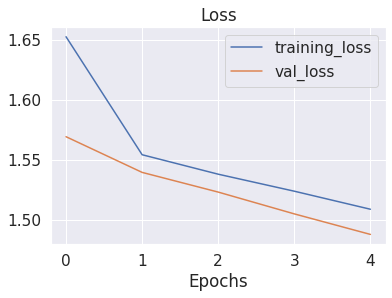

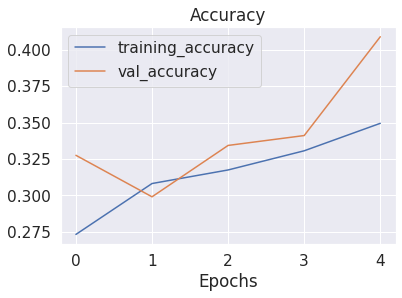

In [31]:
helper_functions.plot_loss_curves(history2)

In [32]:
from tensorflow import keras
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(224,224,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [35]:
model3 = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model3.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 7
history3 = model3.fit(
  train_data,
  validation_data=test_data,
  epochs=epochs
)

Epoch 1/7


439/439 [==============================] - 109s 234ms/step - loss: 1.0446 - accuracy: 0.6018 - val_loss: 0.7917 - val_accuracy: 0.7103
Epoch 2/7
439/439 [==============================] - 102s 233ms/step - loss: 0.7957 - accuracy: 0.7007 - val_loss: 0.7124 - val_accuracy: 0.7387
Epoch 3/7
439/439 [==============================] - 106s 242ms/step - loss: 0.7010 - accuracy: 0.7380 - val_loss: 0.6416 - val_accuracy: 0.7830
Epoch 4/7
439/439 [==============================] - 102s 233ms/step - loss: 0.6451 - accuracy: 0.7605 - val_loss: 0.5988 - val_accuracy: 0.7907
Epoch 5/7
439/439 [==============================] - 101s 229ms/step - loss: 0.5862 - accuracy: 0.7859 - val_loss: 0.7292 - val_accuracy: 0.7467
Epoch 6/7
439/439 [==============================] - 102s 231ms/step - loss: 0.5462 - accuracy: 0.7981 - val_loss: 0.5284 - val_accuracy: 0.8163
Epoch 7/7
439/439 [==============================] - 99s 226ms/step - loss: 0.5197 - accuracy: 0.8130 - val_loss: 0.5847 - val_accuracy: 0.7

In [37]:
model3.evaluate(test_data)

94/94 [==============================] - 7s 72ms/step - loss: 0.5847 - accuracy: 0.7903


[0.5846537351608276, 0.7903333306312561]

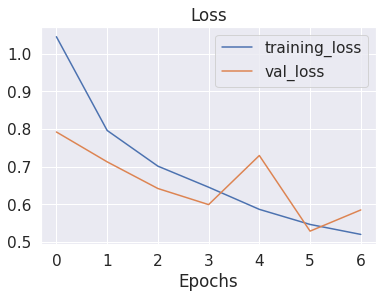

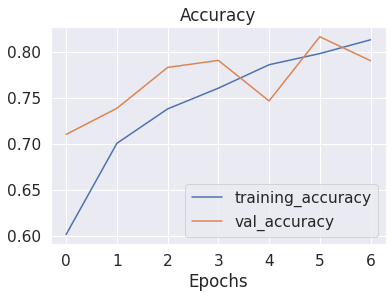

In [38]:
helper_functions.plot_loss_curves(history3)